<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad2/4_Random_Forest_Regresion_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 2

### Practica 4: **Random Forest**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________

### **Random Forest**

**Como funciona**
- Combina muchos árboles de decisión entrenados sobre diferentes subconjuntos de datos y características. La predicción final es el promedio de las predicciones de todos los árboles.  

**Ventajas**
- Reduce el sobreajuste respecto a un solo árbol.
- Maneja bien relaciones complejas y no lineales.
- Proporciona mejor generalización que un árbol individual.

**Limitaciones**
- Menos interpretable que un solo árbol.
- Puede ser más lento y consumir más memoria.

**Diferencias frente a Regresión Lineal y Árboles de Decisión**

| Técnica              | Linealidad | Flexibilidad | Overfitting | Interpretabilidad |
|----------------------|------------|--------------|-------------|-------------------|
| Regresión Lineal     | Alta       | Baja         | Baja        | Alta              |
| Árbol de Decisión    | Baja       | Media        | Alta        | Media             |
| **Random Forest**       | Baja       | **Alta**         | Baja        | Baja              |


*Random Forest es una excelente opción cuando se quiere mejorar la precisión sin preocuparse tanto por la interpretabilidad.*


## **1. Cargar datos y librerías**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
df = pd.read_csv("autos2.csv")
df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,False,True,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,False,True,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,False,True,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,False,True,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,False,True,1,Low


## **2. Definir variables predictoras y variable objetivo**

In [3]:
X = df[['horsepower', 'engine-size', 'city-mpg', 'wheel-base', 'bore']]
y = df['price']


## **3. Dividir en conjunto de entrenamiento y prueba**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **4. Entrenar modelo Random Forest**

In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

## **5. Evaluar el modelo**

In [6]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Coeficiente de determinación (R²): {r2_rf:.2f}")


Error cuadrático medio (MSE): 9610978.35
Coeficiente de determinación (R²): 0.92


In [7]:
import numpy as np
# Calcular el RMSE (mas facil de interpretar que el MSE)
rmse = np.sqrt(mse_rf)
print(f"Raíz del Error cuadrático medio (RMSE): {rmse:.2f}")

Raíz del Error cuadrático medio (RMSE): 3100.16


### **Interpretación**
#### **1. MSE / RMSE**

* El RMSE ≈ 3,100 nos dice que, en promedio, las predicciones de precio tienen un error de aproximadamente 3,100.
* Considerando que la mayoría de los autos están entre 8,000 y 16,000, este error representa aproximadamente entre 19% y 40% del precio, lo cual es aceptable pero no óptimo.

#### **2. R² = 0.92**

* El modelo explica el 92% de la variación del precio de los autos.
* Es un muy buen ajuste, especialmente considerando que Random Forest es un modelo robusto y no lineal.
* El RMSE  es ligeramente peor con respecto a arboles ≈ 3,030 vs ≈ 3,100

* El modelo **puede necesitar ajuste de hiperparámetros** (max_depth, min_samples_split, n_estimators...).

* Las variables predictoras pueden tener límite en su capacidad explicativa del precio

## **6. Comparar precios reales vs predichos**

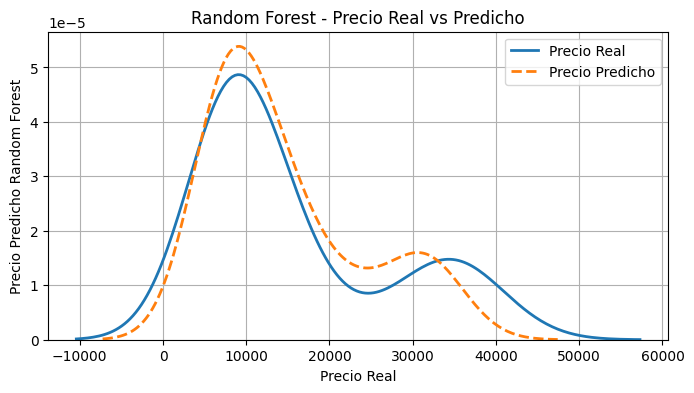

In [8]:
# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred_rf, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Random Forest - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho Random Forest')
plt.legend()
plt.grid(True)
plt.show()

### **Comparar precios con diagrama de dispersión**

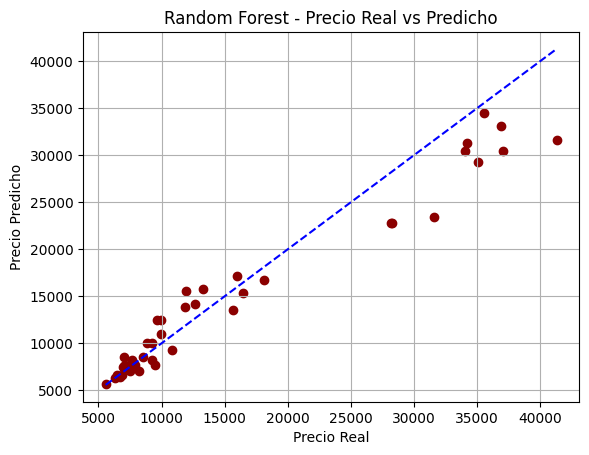

In [9]:
plt.scatter(y_test, y_pred_rf, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest - Precio Real vs Predicho")
plt.grid(True)
plt.show()

### **Interpretación**

1. **Rendimiento en Precios Bajos y Medio**:
* $\text{Precio Real} < 20,000$ (aproximadamente).  La mayoría de los puntos en este rango están muy cerca de la línea ideal.
* El modelo de **Random Forest es muy preciso para predecir los precios de vehículos de gama baja y media**. Es capaz de capturar bien la relación entre las características y el precio en este segmento.  
2. **Rendimiento en Precios Altos**:
* $\text{Precio Real} > 20,000$ (aproximadamente).  La precisión disminuye significativamente.
* Existe una subestimación notable para los vehículos más caros.
* Por ejemplo: Un vehículo con $\text{Precio Real}$ de $\approx 32,000$ es predicho en $\approx 24,000$ (subestimación de $\approx 8,000$).
* Un vehículo con $\text{Precio Real}$ de $\approx 41,000$ es predicho en $\approx 32,000$ (subestimación de $\approx 9,000$).

## **Parámetros ajustables en Random Forest**
En un Random Forest Regressor (Bosque Aleatorio de Regresión) hay varios parámetros que se pueden ajustar para mejorar o analizar el desempeño (MSE, R², RMSE, etc.).

A continuación, se muestran los parámetros más importantes, explicados de manera clara y práctica:


| Parámetro               | Tipo                                                           | Qué hace                                                  | Efecto en el rendimiento                                                                |
| ----------------------- | -------------------------------------------------------------- | --------------------------------------------------------- | --------------------------------------------------------------------------------------- |
| **`n_estimators`**      | int (por defecto 100)                                          | Número de árboles en el bosque                            | ↑ Mejores resultados con más árboles (hasta cierto punto), pero mayor tiempo de cómputo |
| **`max_depth`**         | int o None                                                     | Profundidad máxima de cada árbol                          | ↓ Menor sobreajuste con valores bajos; ↑ mayor ajuste con valores altos                 |
| **`min_samples_split`** | int o float                                                    | Número mínimo de muestras requeridas para dividir un nodo | ↑ Aumentarlo simplifica el modelo (menos sobreajuste)                                   |
| **`min_samples_leaf`**  | int o float                                                    | Mínimo de muestras por hoja                               | ↑ Evita nodos con pocos datos, reduce sobreajuste                                       |
| **`max_features`**      | {"auto", "sqrt", "log2"} o int/float                           | Número de variables consideradas por árbol                | Cambiarlo afecta la diversidad de árboles (√ suele ser buena opción)                    |
| **`bootstrap`**         | bool                                                           | Si se usa muestreo con reemplazo                          | `True` = aleatoriedad y robustez, `False` = más determinista                            |
| **`random_state`**      | int                                                            | Fija la semilla aleatoria                                 | Asegura resultados reproducibles                                                        |
| **`criterion`**         | {"squared_error", "absolute_error", "friedman_mse", "poisson"} | Métrica usada para medir el error dentro del árbol        | Puedes probar `absolute_error` si hay valores atípicos                                  |


In [10]:
# Modelo con parámetros ajustados
rf_model = RandomForestRegressor(
    n_estimators=200,       # más árboles
    max_depth=8,            # limitar profundidad
    min_samples_split=4,    # evitar divisiones con pocos datos
    min_samples_leaf=3,     # cada hoja al menos con 3 observaciones
    max_features='sqrt',    # usa raíz cuadrada del total de features
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")


MSE: 14091439.04
R²: 0.88
RMSE: 3753.86


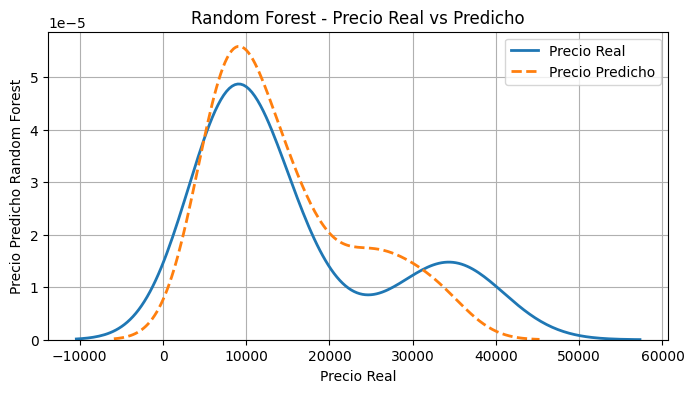

In [11]:
# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Random Forest - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho Random Forest')
plt.legend()
plt.grid(True)
plt.show()

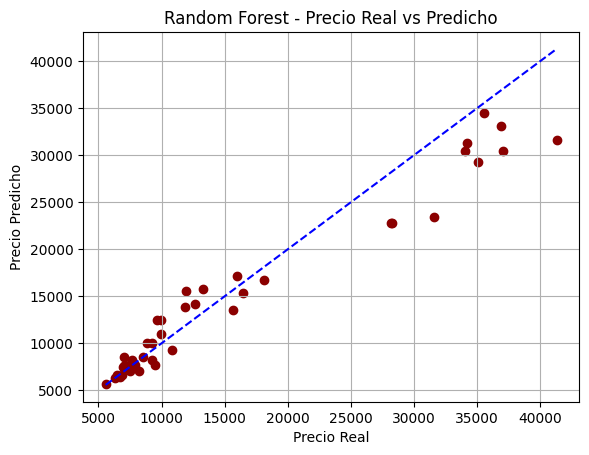

In [13]:
plt.scatter(y_test, y_pred_rf, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest - Precio Real vs Predicho")
plt.grid(True)
plt.show()

## **Ajuste automático (búsqueda de mejores parámetros)**

* Se puede usar Grid Search o Randomized Search para probar varias combinaciones automáticamente.  
* **GridSearchCV** es una herramienta de **Scikit-Learn** que se utiliza para **optimizar hiperparámetros de modelos de machine learning** de forma sistemática y eficiente.  

### **¿Qué hace GridSearchCV?**
* GridSearchCV realiza una búsqueda exhaustiva sobre un conjunto de hiperparámetros especificados para encontrar la mejor combinación que maximice (o minimice) una métrica de evaluación, como la precisión, el R², el F1-score, etc.

### **¿Cómo funciona?**
* Define un espacio de búsqueda: el usuario especifica qué valores quiere probar para cada hiperparámetro.  
* Entrena el modelo con cada combinación de esos valores.  
* Evalúa cada modelo usando validación cruzada (por ejemplo, cv=3 divide los datos en 3 partes).
* Selecciona la mejor combinación según la métrica que elijas (scoring).  

### **¿En qué modelos se puede aplicar?**
GridSearchCV se puede usar con cualquier estimador de Scikit-Learn que tenga hiperparámetros, incluyendo:  

### **Modelos de regresión:**
* LinearRegression
* SVR (Support Vector Regressor)
* RandomForestRegressor
* GradientBoostingRegressor
Ridge, Lasso, ElasticNet

### **Modelos de clasificación:**
* LogisticRegression
* SVC (Support Vector Classifier)
* RandomForestClassifier
* KNeighborsClassifier
* GradientBoostingClassifier
* DecisionTreeClassifier


### **Modelos de clustering (con ciertas adaptaciones):**
* KMeans (por ejemplo, para elegir el número de clusters)



### **Ejecución de Optimización de Hiperparámetros o Ajuste Fino del Modelo**

1. Se define un **diccionario** (param_grid) que especifica una **lista de valores a probar para cada hiperparámetro**.
2. El código **probará todas las combinaciones posibles de estos valores**. Por ejemplo, si hay $3$ valores para n_estimators, $4$ para max_depth, $3$ para min_samples_split, $3$ para min_samples_leaf, y $2$ para max_features, el total de modelos a entrenar y evaluar es: $3 \times 4 \times 3 \times 3 \times 2 = \mathbf{216}$ modelos.
3. Se crea el **objeto GridSearchCV** con el Modelo Base: **RandomForestRegressor(random_state=42) (el modelo a optimizar)**.
4. **cv=3** (Cross-Validation): Utiliza **Validación Cruzada de 3 pliegues**. Esto significa que el conjunto de entrenamiento (X_train, y_train) se divide en 3 partes. Cada combinación de hiperparámetros se entrena 3 veces, usando 2 partes para entrenar y 1 parte para validar, rotando la parte de validación.
5. **scoring='r2'**: La métrica de rendimiento que se utilizará para juzgar qué combinación es la "mejor" es el coeficiente de determinación R²
6. **n_jobs=-1**: Le dice al código que use todos los núcleos de procesamiento disponibles en la máquina para acelerar el entrenamiento de los 216 modelos.
7. **verbose=2**: Imprime mensajes detallados durante la ejecución.

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=3,                # validación cruzada
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R²:", grid_search.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Mejores parámetros: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor R²: 0.8587725936185243


### **Interpretación de Resultados Optimos vs Modelo Inicial**

* **Mejores Parámetros**: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}. Esta fue la **configuración óptima** para el modelo de Random Forest.
* **Mejor R²**: El modelo con los mejores parámetros tiene un coeficiente de determinación R² promedio de **$\approx 85.88\%$** en el conjunto de validación.

### **Comparativa de Óptimo vs Inicial**
- La diferencia más importante es que el R² inicial ($0.92$) es significativamente más alto que el Mejor R² del Grid Search ($0.85877$).
- **Modelo Inicial**: Probablemente tiene una alta varianza y se ajustó demasiado al ruido específico del conjunto de entrenamiento, lo que se traduce en un R² inflado de $0.92$ en los datos que ha visto.
* **Modelo Optimizado (Grid Search)**: El proceso de Grid Search encontró hiperparámetros que penalizan la complejidad (por ejemplo, max_depth: 8 evita árboles demasiado profundos) y, por lo tanto, reduce el sobreajuste. **El R² más bajo ($0.85877$) es el precio de una mejor generalización.**

## **Ejecucion del random Forest con los Mejores Parámetros obtenidos con GridSearchCV**

- El modelo que fue seleccionado por Grid Search fue diseñado para ser más estable (menos propenso al sobreajuste).
- **El sobreajuste (en inglés, overfitting)** es un problema fundamental en el aprendizaje automático (Machine Learning) que ocurre cuando un modelo aprende el ruido y los detalles irrelevantes del conjunto de datos de entrenamiento hasta el punto de que su **rendimiento es muy bueno en esos datos, pero muy malo al enfrentarse a datos nuevos** o no vistos (el conjunto de prueba).

MSE: 14200068.19
R²: 0.88
RMSE: 3768.30


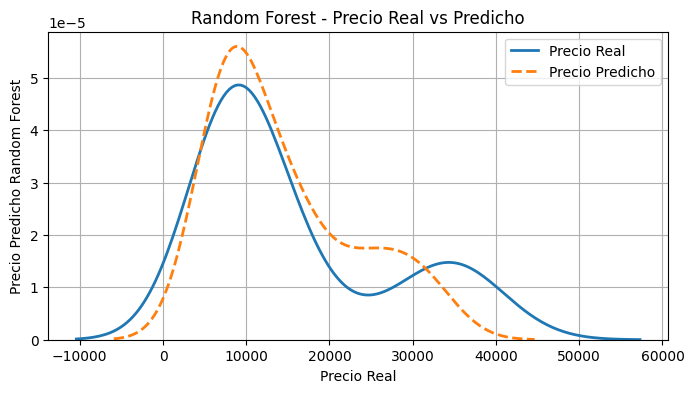

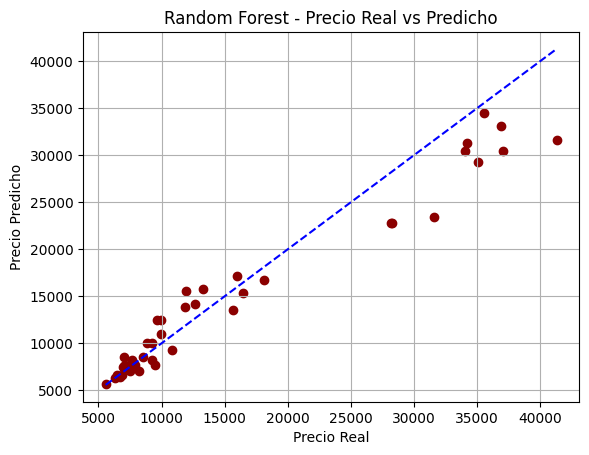

In [14]:
# Modelo con parámetros ajustados
rf_model = RandomForestRegressor(
    n_estimators=300,       # más árboles
    max_depth=8,            # limitar profundidad
    min_samples_split=2,    # evitar divisiones con pocos datos
    min_samples_leaf=1,     # cada hoja al menos con 1 observaciones
    max_features='sqrt',    # usa raíz cuadrada del total de features
    random_state=42
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")

# Comparación visual de distribuciones
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Precio Real', linewidth=2)
sns.kdeplot(y_pred, label='Precio Predicho', linewidth=2, linestyle='--')

plt.title('Random Forest - Precio Real vs Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho Random Forest')
plt.legend()
plt.grid(True)
plt.show()

plt.scatter(y_test, y_pred_rf, color='darkred')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'b--')  # Línea ideal
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Random Forest - Precio Real vs Predicho")
plt.grid(True)
plt.show()

### **Aspectos importantes a tomar en cuenta**

- El hecho de que un modelo sin optimizar supere al modelo de Grid Search podría indicar que el rango de valores se definieron en el param_grid no incluyó la configuración óptima (es decir, el modelo con $n\_estimators=100$ no se probó con las mismas restricciones que el resto de combinaciones, o la combinación de $R^2=0.92$ no estuvo presente en los parametros.